# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

ImportError: cannot import name 'NUMPY_MKL'

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [3]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [6]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [7]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1.36e-6, 1.38e-6, 1.4e-6, 1.42e-6, 1.44e-6, 1.46e-6]
regularization_strengths = [3.5e3, 3.7e3, 3.9e3, 4e3, 4.1e3, 4.3e3]
# lr 1.400000e-06 reg 4.000000e+03 train accuracy: 0.417204 val accuracy: 0.432000

results = {}
best_val = -1
best_svm = None

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
# Preprocessing: reshape the image data into rows
# X_train = np.reshape(X_train, (X_train.shape[0], -1))
# X_val = np.reshape(X_val, (X_val.shape[0], -1))
# X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

print('Training feature shape: ', X_train_feats.shape)
print('Validation feature shape: ', X_val_feats.shape)
print('Test feature shape: ', X_test_feats.shape)

for i in learning_rates:
    for j in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=i, reg=j, num_iters=1500, verbose=True)
        y_train_pred = svm.predict(X_train_feats)
        y_val_pred = svm.predict(X_val_feats)
        training_accuracy = np.mean(y_train == y_train_pred)
        validation_accuracy = np.mean(y_val == y_val_pred)
        results[(i, j)] = (training_accuracy, validation_accuracy)
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

Training data shape:  (49000, 32, 32, 3)
Validation data shape:  (1000, 32, 32, 3)
Test data shape:  (1000, 32, 32, 3)
Training feature shape:  (49000, 155)
Validation feature shape:  (1000, 155)
Test feature shape:  (1000, 155)
iteration 0 / 1500: loss 14.153422
iteration 100 / 1500: loss 9.759942
iteration 200 / 1500: loss 9.109778
iteration 300 / 1500: loss 9.011376
iteration 400 / 1500: loss 8.997427
iteration 500 / 1500: loss 8.995148
iteration 600 / 1500: loss 8.994550
iteration 700 / 1500: loss 8.994198
iteration 800 / 1500: loss 8.994368
iteration 900 / 1500: loss 8.994520
iteration 1000 / 1500: loss 8.994873
iteration 1100 / 1500: loss 8.994724
iteration 1200 / 1500: loss 8.994958
iteration 1300 / 1500: loss 8.995169
iteration 1400 / 1500: loss 8.994699
iteration 0 / 1500: loss 14.785421
iteration 100 / 1500: loss 9.763782
iteration 200 / 1500: loss 9.097097
iteration 300 / 1500: loss 9.009447
iteration 400 / 1500: loss 8.997466
iteration 500 / 1500: loss 8.995716
iteration 60

In [8]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.419


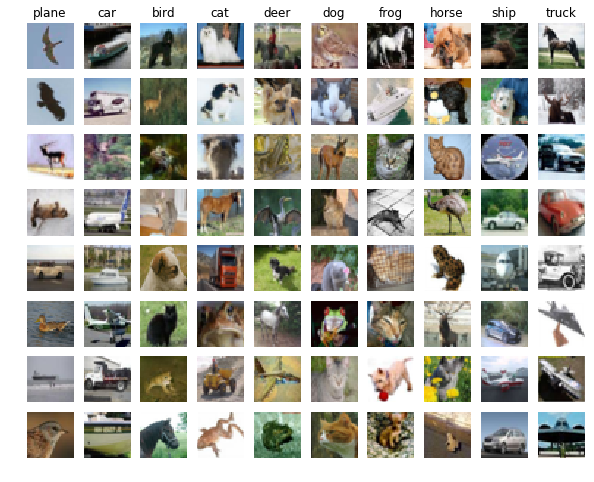

In [9]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
Answer: Some trucks and ships are categorized into car. Some birds and jumping cat are categorized into plane. This makes sense since truck and ship have similar shapes as car.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [1]:
print(X_train_feats.shape)

NameError: name 'X_train_feats' is not defined

In [30]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
results = {}
best_val = -1
best_hidden_size = None
best_net = None                          # store the best model into this 

hidden_sizes = [500]                                       
num_training = 1500
learning_rates = [1e-1, 5e-1, 1, 5]
regularization_strengths = [1e-3, 5e-3, 1e-2]
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
print('Training feature shape: ', X_train_feats.shape)
print('Validation feature shape: ', X_val_feats.shape)
print('Test feature shape: ', X_test_feats.shape)
# print('Training data shape: ', X_train.shape)
# print('Validation data shape: ', X_val.shape)
# print('Test data shape: ', X_test.shape)
# Train the network
for i in learning_rates:
    for j in regularization_strengths:
        for k in hidden_sizes:
            net = TwoLayerNet(input_dim, k, num_classes)
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                            num_iters=num_training, batch_size=200,
                            learning_rate=i, learning_rate_decay=0.95,
                            reg=j, verbose=True)
            # stats contains {'loss_history': loss_history,  
            #                 'train_acc_history': train_acc_history, 
            #                 'val_acc_history': val_acc_history, }
            y_train_pred = net.predict(X_train_feats)
            y_val_pred = net.predict(X_val_feats)
            training_accuracy = np.mean(y_train == y_train_pred)
            validation_accuracy = np.mean(y_val == y_val_pred)
            results[(i, j, k)] = (training_accuracy, validation_accuracy, k)
            if validation_accuracy > best_val:
                best_val = validation_accuracy
                best_hidden_size = k
                best_net = net

# Print out results.
for lr, reg, h_size in sorted(results):
    train_accuracy, val_accuracy, hidden_size = results[(lr, reg, h_size)]
    print('lr %e reg %e hidden_size %d  train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_size, train_accuracy, val_accuracy))
print('best validation accuracy achieved: %f' % best_val)

# Predict on the validation set
val_acc = (best_net.predict(X_val_feats) == y_val).mean()
print('Validation accuracy: ', val_acc)

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Training feature shape:  (49000, 155)
Validation feature shape:  (1000, 155)
Test feature shape:  (1000, 155)
iteration 0 / 1500: loss 2.302586
iteration 100 / 1500: loss 2.303103
iteration 200 / 1500: loss 2.127125
iteration 300 / 1500: loss 1.684713
iteration 400 / 1500: loss 1.628605
iteration 500 / 1500: loss 1.542723
iteration 600 / 1500: loss 1.497549
iteration 700 / 1500: loss 1.479002
iteration 800 / 1500: loss 1.375034
iteration 900 / 1500: loss 1.426738
iteration 1000 / 1500: loss 1.322037
iteration 1100 / 1500: loss 1.291976
iteration 1200 / 1500: loss 1.394161
iteration 1300 / 1500: loss 1.474064
iteration 1400 / 1500: loss 1.333705
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss 2.303448
iteration 200 / 1500: loss 2.162865
iteration 300 / 1500: loss 1.820183
iteration 400 / 1500: loss 1.713818
iteration 500 / 1500: loss 1.635676
iteration 600 / 1500: loss 1.600439
iteration 700 / 1500: loss 1.527329
iteration 800 / 1500: loss 1.573332
iteration 900 / 1500: los

F:\python\notebooks\assignment1\cs231n\classifiers\neural_net.py:119: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
F:\python\notebooks\assignment1\cs231n\classifiers\neural_net.py:121: RuntimeWarning: invalid value encountered in true_divide
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
F:\python\notebooks\assignment1\cs231n\classifiers\neural_net.py:122: RuntimeWarning: divide by zero encountered in log
  corect_logprobs = -np.log(probs[range(num_examples),y])
F:\python\notebooks\assignment1\cs231n\classifiers\neural_net.py:83: RuntimeWarning: invalid value encountered in maximum
  h1 = np.maximum(0, X.dot(W1) + b1)              # (5, 10)
F:\python\notebooks\assignment1\cs231n\classifiers\neural_net.py:164: RuntimeWarning: invalid value encountered in greater
  ReLU_d_h1 = d_h1 * (h1 > 0)                             # max(0, ) operation
F:\python\notebooks\assignment1\cs231n\classifiers\neural_net.py:286: RuntimeWarning: invalid value en


iteration 300 / 1500: loss nan
iteration 400 / 1500: loss nan
iteration 500 / 1500: loss nan
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
iteration 0 / 1500: loss 2.302589
iteration 100 / 1500: loss nan
iteration 200 / 1500: loss nan
iteration 300 / 1500: loss nan
iteration 400 / 1500: loss nan
iteration 500 / 1500: loss nan
iteration 600 / 1500: loss nan
iteration 700 / 1500: loss nan
iteration 800 / 1500: loss nan
iteration 900 / 1500: loss nan
iteration 1000 / 1500: loss nan
iteration 1100 / 1500: loss nan
iteration 1200 / 1500: loss nan
iteration 1300 / 1500: loss nan
iteration 1400 / 1500: loss nan
iteration 0 / 1500: loss 2.302593
iteration 100 / 1500: loss nan
iteration 200 / 1500: loss nan
iteration 300 / 1500: loss nan
iteration 400 / 1500: 

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

In [18]:
### jixin's own feature extension
# referenced feature: http://dataunion.org/20584.html
# referenced feature: http://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
# add LBP(local binary patterns)
# add saturation of hsv feature
# add value of hsv feature
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, local_binary_pattern,\
               lambda img: color_histogram_hsv(img, nbin=num_color_bins),\
               lambda img: color_histogram_hsv_s(img, nbin=num_color_bins),\
               lambda img: color_histogram_hsv_v(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])


Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [20]:
print(X_train_feats.shape)

from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
results = {}
best_val = -1
best_hidden_size = None
best_net = None                          # store the best model into this 

hidden_sizes = [500]                                       
num_training = 2000
learning_rates = [2e-1, 3e-1]
regularization_strengths = [0.4e-3, 0.6e-3]

print('Training feature shape: ', X_train_feats.shape)
print('Validation feature shape: ', X_val_feats.shape)
print('Test feature shape: ', X_test_feats.shape)

for i in learning_rates:
    for j in regularization_strengths:
        for k in hidden_sizes:
            net = TwoLayerNet(input_dim, k, num_classes)
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                            num_iters=num_training, batch_size=200,
                            learning_rate=i, learning_rate_decay=0.95,
                            reg=j, verbose=True)
            y_train_pred = net.predict(X_train_feats)
            y_val_pred = net.predict(X_val_feats)
            training_accuracy = np.mean(y_train == y_train_pred)
            validation_accuracy = np.mean(y_val == y_val_pred)
            results[(i, j, k)] = (training_accuracy, validation_accuracy, k)
            if validation_accuracy > best_val:
                best_val = validation_accuracy
                best_hidden_size = k
                best_net = net

# Print out results.
for lr, reg, h_size in sorted(results):
    train_accuracy, val_accuracy, hidden_size = results[(lr, reg, h_size)]
    print('lr %e reg %e hidden_size %d  train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_size, train_accuracy, val_accuracy))
print('best validation accuracy achieved: %f' % best_val)

# Predict on the validation set
val_acc = (best_net.predict(X_val_feats) == y_val).mean()
print('Validation accuracy: ', val_acc)

(49000, 633)
Training feature shape:  (49000, 633)
Validation feature shape:  (1000, 633)
Test feature shape:  (1000, 633)
iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 1.829769
iteration 200 / 2000: loss 1.393323
iteration 300 / 2000: loss 1.123015
iteration 400 / 2000: loss 1.303902
iteration 500 / 2000: loss 1.253092
iteration 600 / 2000: loss 1.142828
iteration 700 / 2000: loss 0.963983
iteration 800 / 2000: loss 1.067700
iteration 900 / 2000: loss 0.934052
iteration 1000 / 2000: loss 0.958351
iteration 1100 / 2000: loss 0.969150
iteration 1200 / 2000: loss 1.011949
iteration 1300 / 2000: loss 1.011818
iteration 1400 / 2000: loss 0.921640
iteration 1500 / 2000: loss 0.765507
iteration 1600 / 2000: loss 0.975245
iteration 1700 / 2000: loss 0.729027
iteration 1800 / 2000: loss 0.719943
iteration 1900 / 2000: loss 0.714060
iteration 0 / 2000: loss 2.302587
iteration 100 / 2000: loss 1.871297
iteration 200 / 2000: loss 1.472078
iteration 300 / 2000: loss 1.312624
iterati

In [17]:
test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.622
